In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import random
import time

# -------------------------------
# Load & Preprocess CIFAR-10 Dataset
# -------------------------------
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Dataset loaded and preprocessed.\n")


# -------------------------------
# Simulated Annealing for Hyperparameter Tuning
# -------------------------------
LEARNING_RATE_RANGE = (0.0001, 0.01)
DROPOUT_RANGE = (0.1, 0.5)
KERNEL_SIZES = [(3, 3), (5, 5)]
BATCH_SIZES = [32, 64, 128] 
FILTER_SIZES = [32, 64, 128] 

# Define Simulated Annealing parameters
initial_temperature = 10.0
cooling_rate = 0.9
iterations = 10

# Initial Hyperparameters
current_lr = 0.001  
current_dropout = 0.3  
current_kernel = (3, 3)  
current_batch_size = 32  
current_filters = 64  

def create_cnn(learning_rate, dropout_rate, kernel_size, batch_size, num_filters):
    model = models.Sequential([
        layers.Conv2D(num_filters, kernel_size, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(num_filters * 2, kernel_size, padding='same', use_bias=False, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_filters, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print("Starting Simulated Annealing for Hyperparameter Tuning...\n")
start_time = time.time()

model = create_cnn(current_lr, current_dropout, current_kernel, current_batch_size, current_filters)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=current_batch_size, verbose=1)
current_val_acc = max(history.history['val_accuracy'])

temperature = initial_temperature
for i in range(iterations):
    iter_start = time.time()

    new_lr = np.clip(current_lr + np.random.uniform(-0.0005, 0.0005), *LEARNING_RATE_RANGE)
    new_dropout = np.clip(current_dropout + np.random.uniform(-0.05, 0.05), *DROPOUT_RANGE)
    new_kernel = random.choice(KERNEL_SIZES)
    new_batch_size = random.choice(BATCH_SIZES)
    new_filters = random.choice(FILTER_SIZES)

    new_model = create_cnn(new_lr, new_dropout, new_kernel, new_batch_size, new_filters)
    history = new_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=new_batch_size, verbose=1)
    new_val_acc = max(history.history['val_accuracy'])

    delta = new_val_acc - current_val_acc
    acceptance_prob = np.exp(delta / temperature) if delta < 0 else 1.0

    if np.random.rand() < acceptance_prob:
        current_lr, current_dropout, current_kernel, current_batch_size, current_filters, current_val_acc = (
            new_lr, new_dropout, new_kernel, new_batch_size, new_filters, new_val_acc
        )
        print(f"Iteration {i+1}: Accepted → LR: {current_lr:.5f}, Dropout: {current_dropout:.2f}, Kernel: {current_kernel}, Batch Size: {current_batch_size}, Filters: {current_filters}, Accuracy: {current_val_acc:.4f}")

    iter_end = time.time()
    print(f"Iteration {i+1} completed in {iter_end - iter_start:.2f} seconds.\n")
    temperature *= cooling_rate

best_lr = current_lr
best_dropout = current_dropout
best_kernel = current_kernel
best_batch_size = current_batch_size
best_filters = current_filters
best_val_acc = current_val_acc

end_time = time.time()
print(f"\nFinal Optimized Hyperparameters → LR: {best_lr:.5f}, Dropout: {best_dropout:.2f}, Kernel: {best_kernel}, Batch Size: {best_batch_size}, Filters: {best_filters}, Best Val Accuracy: {best_val_acc:.4f}")
print(f"Total Simulated Annealing time: {end_time - start_time:.2f} seconds.\n")

Loading CIFAR-10 dataset...
Dataset loaded and preprocessed.

Starting Simulated Annealing for Hyperparameter Tuning...



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2619 - loss: 1.9640 - val_accuracy: 0.5013 - val_loss: 1.3860
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4226 - loss: 1.5214 - val_accuracy: 0.5763 - val_loss: 1.2164
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4710 - loss: 1.4042 - val_accuracy: 0.5870 - val_loss: 1.1945
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.2871 - loss: 1.9194 - val_accuracy: 0.5292 - val_loss: 1.3443
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.5012 - loss: 1.3890 - val_accuracy: 0.6125 - val_loss: 1.1324
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.5678 - loss: 1.2108 - val_accuracy: 0.6330 - val_loss: 1.0692
Iteration 1: Accepted → LR: 0.00088, Dropout: 0.31, Kernel: (5, 5), Batch Size: 64, Filters: 64, Accuracy: 0.6330
Iteration 1 completed in 94.41 seconds.

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 

In [2]:
normal_cnn = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)), 
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'), 
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

normal_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),  
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

normal_cnn.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 32)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 64)     │        51,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,458 (1.21 MB)

 Trainable params: 316,458 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Improved CNN with batch normalization and dropout, using best hyperparameters
improved_cnn = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, best_kernel, padding='valid', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, best_kernel, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, best_kernel, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(best_dropout),
    layers.Dense(128, activation='relu'),
    layers.Dropout(best_dropout),  
    layers.Dense(10, activation='softmax')
])

improved_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

improved_cnn.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 64)     │        51,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 6, 6, 128)      │       204,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 3, 3, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 3, 3, 256)      │       819,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,703,786 (6.50 MB)

 Trainable params: 1,702,826 (6.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [4]:
# Adversarially-Trained CNN (same structure as Simple CNN)
adversarial_cnn = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

adversarial_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

adversarial_cnn.summary()
print("\nAdversarial CNN defined (same as Simple CNN). Will be trained on adversarial data later.\n")


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 64)     │        51,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,458 (1.21 MB)

 Trainable params: 316,458 (1.21 MB)

 Non-trainable params: 0 (0.00 B)


Adversarial CNN defined (same as Simple CNN). Will be trained on adversarial data later.



In [5]:
# Hybrid CNN (same structure as Simple CNN)
hybrid_cnn = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

hybrid_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

hybrid_cnn.summary()
print("\nHybrid CNN defined (same as Simple CNN). Will be trained on 70% adversarial + 30% clean data later.\n")


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │        51,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,458 (1.21 MB)

 Trainable params: 316,458 (1.21 MB)

 Non-trainable params: 0 (0.00 B)


Hybrid CNN defined (same as Simple CNN). Will be trained on 70% adversarial + 30% clean data later.



In [6]:
# ------------------------------
# Training Normal CNN on Clean CIFAR-10
# ------------------------------
print("\n🔵 Training Normal CNN on clean data...\n")
history_normal = normal_cnn.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=best_batch_size,
    verbose=1  # Shows progress bar and accuracy per epoch
)

# Optional: Print final metrics
print(f"\n🔹 Final Normal CNN Accuracy: {history_normal.history['accuracy'][-1]:.4f} | Validation Accuracy: {history_normal.history['val_accuracy'][-1]:.4f}\n")


# ------------------------------
# Training Improved CNN on Clean CIFAR-10
# ------------------------------
print("\n🟡 Training Improved CNN on clean data...\n")
history_improved = improved_cnn.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=best_batch_size,
    verbose=1
)

# Optional: Print final metrics
print(f"\n🔹 Final Improved CNN Accuracy: {history_improved.history['accuracy'][-1]:.4f} | Validation Accuracy: {history_improved.history['val_accuracy'][-1]:.4f}\n")



🔵 Training Normal CNN on clean data...

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.3634 - loss: 1.7527 - val_accuracy: 0.5693 - val_loss: 1.2175
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5830 - loss: 1.1811 - val_accuracy: 0.6284 - val_loss: 1.0665
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6585 - loss: 0.9767 - val_accuracy: 0.6588 - val_loss: 0.9844
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6984 - loss: 0.8713 - val_accuracy: 0.6381 - val_loss: 1.0484
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7341 - loss: 0.7714 - val_accuracy: 0.6622 - val_loss: 0.9877
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7593 - loss: 0.6920 - val_accuracy: 0.6910 - val_loss: 0.9263
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7799 - loss: 0.6295 - val_accuracy: 0.6891 - val_loss: 0.9474
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/


🧪 Training FGSM Generator Model (used only to generate adversarial data)...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3541 - loss: 1.7563
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5850 - loss: 1.1760
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6568 - loss: 0.9808
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6998 - loss: 0.8653
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7461 - loss: 0.7403

⚡ Generating adversarial training and validation data (ε = 0.03)...
✅ FGSM adversarial datasets created.

🔍 Perturbed pixels in sample 0: 3072/3072


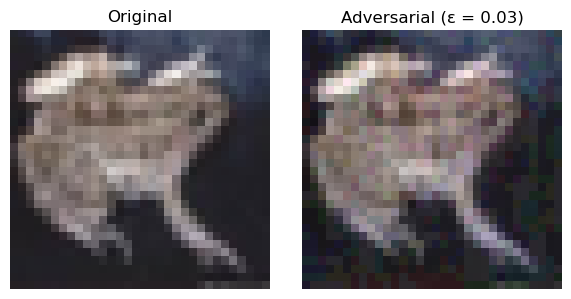

In [7]:
import matplotlib.pyplot as plt

print("\n🧪 Training FGSM Generator Model (used only to generate adversarial data)...")

# FGSM Generator Model (same as Simple CNN)
fgsm_generator_model = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

fgsm_generator_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

# Train the generator model (only used for attack crafting, not evaluation!)
fgsm_generator_model.fit(x_train, y_train, epochs=5, batch_size=best_batch_size, verbose=1)

# FGSM Attack Function (epsilon = 0.03)
def generate_fgsm_adversarial_data(model, x_data, y_data, epsilon=0.03):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
    x_adversarial = tf.convert_to_tensor(x_data, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(x_adversarial)
        predictions = model(x_adversarial)
        loss = loss_object(y_data, predictions)

    gradients = tape.gradient(loss, x_adversarial)
    signed_grad = tf.sign(gradients)
    x_adversarial = x_adversarial + epsilon * signed_grad
    x_adversarial = tf.clip_by_value(x_adversarial, 0, 1)

    return x_adversarial.numpy()

print("\n⚡ Generating adversarial training and validation data (ε = 0.03)...")

# Generate adversarial datasets
x_train_adv = generate_fgsm_adversarial_data(fgsm_generator_model, x_train, y_train, epsilon=0.03)
x_val_adv = generate_fgsm_adversarial_data(fgsm_generator_model, x_val, y_val, epsilon=0.03)

print("✅ FGSM adversarial datasets created.\n")

# ------------------------------
# Visualize an adversarial example vs original
# ------------------------------
sample_index = 0
original_image = x_train[sample_index]
adversarial_image = x_train_adv[sample_index]

# Count how many pixels changed
pixel_diff = np.sum(np.abs(original_image - adversarial_image) > 0.001)
total_pixels = np.prod(original_image.shape)
print(f"🔍 Perturbed pixels in sample {sample_index}: {pixel_diff}/{total_pixels}")

# Show original and adversarial images side by side
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adversarial_image)
plt.title("Adversarial (ε = 0.03)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
print("\n🔴 Training Adversarial CNN on adversarial data...\n")

history_adv = adversarial_cnn.fit(
    x_train_adv, y_train,
    epochs=10,
    validation_data=(x_val_adv, y_val),
    batch_size=best_batch_size,
    verbose=1
)

# Optional: Print final training/validation accuracy
print(f"\n🔹 Final Adversarial CNN Accuracy: {history_adv.history['accuracy'][-1]:.4f} | Validation Accuracy: {history_adv.history['val_accuracy'][-1]:.4f}\n")



🔴 Training Adversarial CNN on adversarial data...

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.3193 - loss: 1.8366 - val_accuracy: 0.4887 - val_loss: 1.4565
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5306 - loss: 1.3549 - val_accuracy: 0.6290 - val_loss: 1.1334
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6812 - loss: 0.9875 - val_accuracy: 0.7173 - val_loss: 0.8900
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7534 - loss: 0.7774 - val_accuracy: 0.7404 - val_loss: 0.8037
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7905 - loss: 0.6492 - val_accuracy: 0.7542 - val_loss: 0.7818
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8260 - loss: 0.5352 - val_accuracy: 0.7839 - val_loss: 0.6801
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8504 - loss: 0.4589 - val_accuracy: 0.7829 - val_loss: 0.7137
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━

In [9]:
print("\n🟣 Training Hybrid CNN on 70% adversarial + 30% clean data (no duplicate samples)...\n")

# Shuffle indices to avoid overlap
total_indices = np.arange(len(x_train))
np.random.shuffle(total_indices)

# Split indices
num_adv = int(0.7 * len(x_train))
adv_indices = total_indices[:num_adv]
clean_indices = total_indices[num_adv:]

# Get clean and adversarial parts without overlapping
x_adv_part = x_train_adv[adv_indices]
y_adv_part = y_train[adv_indices]

x_clean_part = x_train[clean_indices]
y_clean_part = y_train[clean_indices]

# Concatenate into hybrid dataset
hybrid_x_train = np.concatenate((x_adv_part, x_clean_part))
hybrid_y_train = np.concatenate((y_adv_part, y_clean_part))

# Train Hybrid CNN
history_hybrid = hybrid_cnn.fit(
    hybrid_x_train, hybrid_y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=best_batch_size,
    verbose=1
)

# Print final results
print(f"\n🔹 Final Hybrid CNN Accuracy: {history_hybrid.history['accuracy'][-1]:.4f} | Validation Accuracy: {history_hybrid.history['val_accuracy'][-1]:.4f}\n")



🟣 Training Hybrid CNN on 70% adversarial + 30% clean data (no duplicate samples)...

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.3137 - loss: 1.8721 - val_accuracy: 0.5038 - val_loss: 1.3936
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4853 - loss: 1.4322 - val_accuracy: 0.5168 - val_loss: 1.3508
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5471 - loss: 1.2809 - val_accuracy: 0.5209 - val_loss: 1.3219
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6072 - loss: 1.1280 - val_accuracy: 0.5519 - val_loss: 1.2599
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6626 - loss: 0.9900 - val_accuracy: 0.5436 - val_loss: 1.3009
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7036 - loss: 0.8810 - val_accuracy: 0.5616 - val_loss: 1.2755
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7419 - loss: 0.7723 - val_accuracy: 0.5598 - val_loss: 1.3399
Epoc

In [10]:
print("\n🧪 Training separate FGSM Generator for test set...\n")

# Define a fresh FGSM generator model (same structure as Simple CNN)
test_fgsm_model = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

test_fgsm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Train only for attack generation (not for evaluation)
test_fgsm_model.fit(x_train, y_train, epochs=5, batch_size=best_batch_size, verbose=1)

# Generate adversarial test set
print("\n⚡ Generating FGSM adversarial test data (ε = 0.03)...\n")
x_test_adv = generate_fgsm_adversarial_data(test_fgsm_model, x_test, y_test, epsilon=0.03)

# Create 50/50 split (randomized, no overlap)
total_indices = np.arange(len(x_test))
np.random.shuffle(total_indices)

half = len(x_test) // 2
clean_test_indices = total_indices[:half]
adv_test_indices = total_indices[half:]

x_test_50 = np.concatenate((x_test[clean_test_indices], x_test_adv[adv_test_indices]))
y_test_50 = np.concatenate((y_test[clean_test_indices], y_test[adv_test_indices]))

print("✅ 50/50 Clean/Adversarial test set created.")
print(f"Clean samples: {len(clean_test_indices)} | Adversarial samples: {len(adv_test_indices)}\n")

# Optional: Sanity check that there is no overlap
overlap = np.intersect1d(clean_test_indices, adv_test_indices)
print(f"🔍 Overlapping test samples between clean/adv split: {len(overlap)}")  # should be 0



🧪 Training separate FGSM Generator for test set...

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.3619 - loss: 1.7533
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5861 - loss: 1.1702
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6502 - loss: 1.0016
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6991 - loss: 0.8685
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7287 - loss: 0.7673

⚡ Generating FGSM adversarial test data (ε = 0.03)...

✅ 50/50 Clean/Adversarial test set created.
Clean samples: 5000 | Adversarial samples: 5000

🔍 Overlapping test samples between clean/adv split: 0


In [11]:
print("\n📊 Evaluating All Models on Clean, Adversarial, and 50/50 Mixed Test Sets...\n")

models_to_test = {
    "Normal CNN": normal_cnn,
    "Improved CNN": improved_cnn,
    "Adversarial CNN": adversarial_cnn,
    "Hybrid CNN": hybrid_cnn
}

results = {
    "Model": [],
    "Clean Accuracy": [],
    "Adversarial Accuracy": [],
    "50/50 Accuracy": []
}

for name, model in models_to_test.items():
    print(f"🔎 Evaluating {name}...")
    clean_acc = model.evaluate(x_test, y_test, verbose=0)[1]
    adv_acc = model.evaluate(x_test_adv, y_test, verbose=0)[1]
    mixed_acc = model.evaluate(x_test_50, y_test_50, verbose=0)[1]

    print(f"   ✅ Clean Accuracy: {clean_acc:.4f}")
    print(f"   ⚠️  Adversarial Accuracy: {adv_acc:.4f}")
    print(f"   🔀 50/50 Accuracy: {mixed_acc:.4f}\n")

    results["Model"].append(name)
    results["Clean Accuracy"].append(clean_acc)
    results["Adversarial Accuracy"].append(adv_acc)
    results["50/50 Accuracy"].append(mixed_acc)



📊 Evaluating All Models on Clean, Adversarial, and 50/50 Mixed Test Sets...

🔎 Evaluating Normal CNN...
   ✅ Clean Accuracy: 0.6720
   ⚠️  Adversarial Accuracy: 0.3599
   🔀 50/50 Accuracy: 0.5178

🔎 Evaluating Improved CNN...
   ✅ Clean Accuracy: 0.7364
   ⚠️  Adversarial Accuracy: 0.4894
   🔀 50/50 Accuracy: 0.6100

🔎 Evaluating Adversarial CNN...
   ✅ Clean Accuracy: 0.4206
   ⚠️  Adversarial Accuracy: 0.5248
   🔀 50/50 Accuracy: 0.4705

🔎 Evaluating Hybrid CNN...
   ✅ Clean Accuracy: 0.5510
   ⚠️  Adversarial Accuracy: 0.5494
   🔀 50/50 Accuracy: 0.5489



In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Optional: round values for display
df_results_rounded = df_results.copy()
df_results_rounded.iloc[:, 1:] = df_results_rounded.iloc[:, 1:].round(4)

print("\n📋 Evaluation Results Table:")
print(df_results_rounded)



📋 Evaluation Results Table:
             Model  Clean Accuracy  Adversarial Accuracy  50/50 Accuracy
0       Normal CNN          0.6720                0.3599          0.5178
1     Improved CNN          0.7364                0.4894          0.6100
2  Adversarial CNN          0.4206                0.5248          0.4705
3       Hybrid CNN          0.5510                0.5494          0.5489


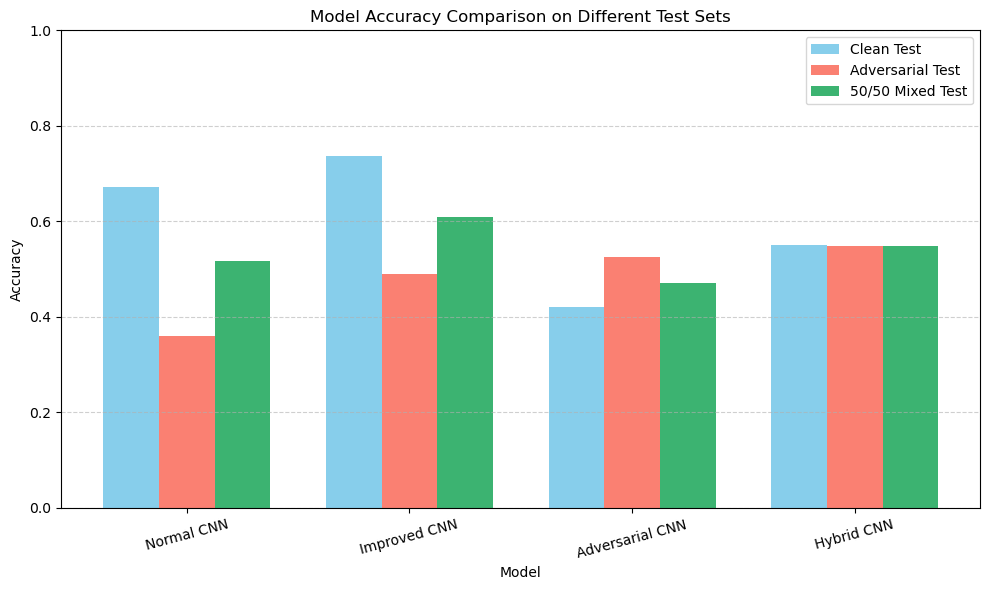

In [13]:
# Plotting grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(df_results["Model"]))

plt.bar(index, df_results["Clean Accuracy"], bar_width, label='Clean Test', color='skyblue')
plt.bar(index + bar_width, df_results["Adversarial Accuracy"], bar_width, label='Adversarial Test', color='salmon')
plt.bar(index + 2 * bar_width, df_results["50/50 Accuracy"], bar_width, label='50/50 Mixed Test', color='mediumseagreen')

# Labels and legend
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison on Different Test Sets')
plt.xticks(index + bar_width, df_results["Model"], rotation=15)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
